In [1]:
dataset=[['Milk','Onion','Nutmeg','Kidney Beans','Eggs','Yogurt'],
        ['Dill','Onion','Nutmeg','Kidney Beans','Eggs','Yogurt'],
        ['Milk','Apple','Kidney Beans','Eggs'],
        ['Milk','Unicorn','Corn','Kidney Beans','Yogurt'],
        ['Corn','Onion','Onion','Kidney Beans','Ice cream','Eggs']]

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

- support
  - 전체 거래에서 특정 물품 A와 B가 동시에 거래되는 비중.
  - 해당 규칙이 얼마나 의미있는지 보여줌.
- confidence
  - A를 포함하는 거래 중 A와 B가 동시에 거래되는 비중
- lift
  - A라는 상품에서 신뢰도가 동일한 상품 B와 C가 존재할 때, 어떤 상품을 더 추천해야 좋을지 판단.
  - A와 B가 동시에 거래된 비중을 A와 B가 서로 독립된 사건일 때 동시에 거래된 비중으로 나눈 값









In [8]:
# n번째에 X가 있으면 True, 아니면 False
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary,columns=oht.columns_)
print(df)

   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  


In [9]:
# min_support = 0.6
# eggs를 살 확률은 0.8, eggs,onion을 같이 살 확률은 0.6
frequent_itemsets=apriori(df,min_support=0.6,use_colnames=True)
print(frequent_itemsets)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Eggs, Onion)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Eggs, Onion, Kidney Beans)


In [10]:
# confidence 0.7 이상
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
# 그 중에서 lift 1.2이상
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.2)
print(rules)

             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Eggs, Kidney Beans)                (Onion)                 0.8   
3  (Onion, Kidney Beans)                 (Eggs)                 0.6   
4                 (Eggs)  (Onion, Kidney Beans)                 0.8   
5                (Onion)   (Eggs, Kidney Beans)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  
0                 0.6      0.6        0.75  1.25      0.12         1.6  
1                 0.8      0.6        1.00  1.25      0.12         inf  
2                 0.6      0.6        0.75  1.25      0.12         1.6  
3                 0.8      0.6        1.00  1.25      0.12         inf  
4                 0.6      0.6        0.75  1.25      0.12         1.6  
5                 0.8      0.6        1.00  1.25      0.12      

In [11]:
support=list(rules['support'].values)
confidence=list(rules['confidence'].values)

In [12]:
import random
import matplotlib.pyplot as plt

여기는 왜 해주는지 모르겠다

In [13]:
for i in range(len(support)):
    support[i]=support[i]+0.0025*(random.randint(1,10)-5)
    confidence[i]=confidence[i]+0.0025*(random.randint(1,10)-5)

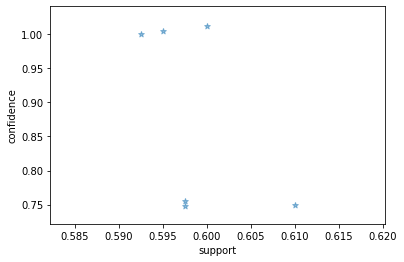

In [14]:
plt.scatter(support,confidence,alpha=0.5,marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [15]:
import numpy as np

In [20]:
def draw_graph(rules,rules_to_show):
    import networkx as nx
    G1 = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11']
    
    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a,"R"+str(i),color=colors[i],weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i),c,color=colors[i],weight=2)
            
    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
            
    edges=G1.edges()
    colors=[G1[u][v]['color'] for u,v in edges]
    weights=[G1[u][v]['weight'] for u,v in edges]
    
    pos=nx.spring_layout(G1,k=16,scale=1)
    nx.draw(G1, pos, edges=edges, node_color=color_map, edge_color=colors, 
       width=weights, font_size=16, with_labels=False)
    
    for p in pos: # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1,pos)
    plt.show()

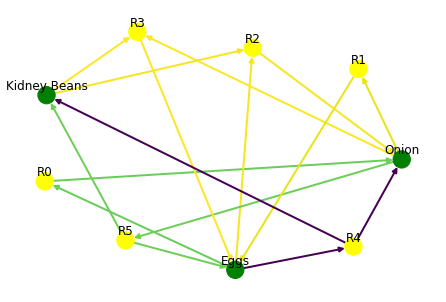

In [22]:
draw_graph(rules,6)